# Generate Data

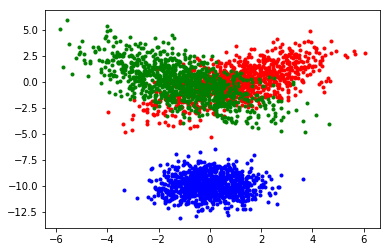

In [73]:
import numpy
import matplotlib.pyplot as pyplot

u1 = numpy.array([1, 0])
u2 = [-1, 0]
u3 = [0, -10]
U = numpy.array([[1/(numpy.sqrt(2)), -1/(numpy.sqrt(2))], [1/(numpy.sqrt(2)), 1/(numpy.sqrt(2))]])
lam1 = numpy.array([[4, 0], [0, 1]])
lam2 = numpy.array([[1, 0], [0, 5]])
sig1 = numpy.matmul(numpy.matmul(U,lam1),U.T)
sig2 = numpy.matmul(numpy.matmul(U,lam2),U.T)
sig3 = numpy.eye(2)

x1 = numpy.random.multivariate_normal(u1, sig1, (1000))
x2 = numpy.random.multivariate_normal(u2, sig2, (1000))
x3 = numpy.random.multivariate_normal(u3, sig3, (1000))

x1 = x1.T
x2 = x2.T
x3 = x3.T

pyplot.figure()
pyplot.plot(x1[0,:],x1[1,:], '.r', x2[0,:],x2[1,:], '.g', x3[0,:],x3[1,:], '.b');

# K Means Clustering

In [74]:
C1 = numpy.array([[],[]])
C2 = numpy.array([[],[]])
C3 = numpy.array([[],[]])



alld = numpy.hstack((x1,x2,x3))
delta = 1

#Random Initialization
for i in range(3000):
    cl = numpy.random.randint(1,4)
    if cl == 1:
        C1 = numpy.hstack((C1, numpy.reshape(alld[:, i], [2,1])))
    if cl == 2:
        C2 = numpy.hstack((C2, numpy.reshape(alld[:, i], [2,1])))
    if cl == 3:
        C3 = numpy.hstack((C3, numpy.reshape(alld[:, i], [2,1])))


while delta != 0:
    delta = 0
    
    #Temperary Cluster Variables
    C1t = numpy.array([[],[]])
    C2t = numpy.array([[],[]])
    C3t = numpy.array([[],[]])
    
    u1 = numpy.mean(C1, 1)
    u2 = numpy.mean(C2, 1)
    u3 = numpy.mean(C3, 1)
    
    
    #Looping Through each Cluster
    for k in range(3):
        if k == 0:
            Cc = C1
        if k == 1:
            Cc = C2
        if k == 2:
            Cc = C3
        for j in range(numpy.shape(Cc)[1]):
            d1 = numpy.linalg.norm((Cc[:,j] - u1), 2,)**2
            d2 = numpy.linalg.norm((Cc[:,j] - u2), 2,)**2
            d3 = numpy.linalg.norm((Cc[:,j] - u3), 2,)**2

            m = numpy.argmin([d1, d2, d3])
            
            if k != m:
                delta = 1

            if m == 0:
                C1t = numpy.hstack((C1t, numpy.reshape(Cc[:, j], [2,1])))
            if m == 1:
                C2t = numpy.hstack((C2t, numpy.reshape(Cc[:, j], [2,1])))
            if m == 2:
                C3t = numpy.hstack((C3t, numpy.reshape(Cc[:, j], [2,1])))
    #Overwritting Old Clusters
    C1 = C1t
    C2 = C2t
    C3 = C3t


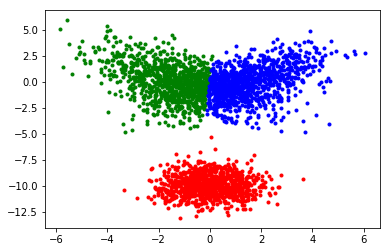

In [75]:
pyplot.figure()
pyplot.plot(C1[0,:],C1[1,:], '.r', C2[0,:],C2[1,:], '.g', C3[0,:],C3[1,:], '.b')


[-1.70031759  0.1923391 ]
